  # AMAÇ

    Cust Segmentation veri seti ile amacım insanların yaş, eğitim, çalışma yılı ve gelirlerine göre gelir gider oranlarını tahmin ettirmeye çalışmaktır. İnsanların gelir gider oranlarının değişken olarak girdiğimiz parametlerle ne kadar ilgili olduğunu görmüş olacağız.

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from skompiler import skompile
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMRegressor
from warnings import filterwarnings
filterwarnings('ignore')
from datetime import datetime
import researchpy as rp
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

Referans kaynaklarda bulunan kütüphanelerı ekledim.

## 1. VERİYE İLK BAKIŞ



In [2]:
ad = pd.read_csv("cust_segmentation.csv")
df = ad.copy()
df.shape

(850, 9)

In [3]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Veri setimizin ilk 5 değerini ekrana bastırdık.

In [4]:
df.tail()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9
849,850,52,1,16,64,1.866,3.638,0.0,8.6


Veri setimizin son 5 değerini ekrana bastırdık.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [6]:
df=df.drop(["Customer Id","Card Debt","Other Debt","Defaulted"], axis = 1)
df.head()

,Age,Edu,Years Employed,Income,DebtIncomeRatio
0,41,2,6,19,6.3
1,47,1,26,100,12.8
2,33,2,10,57,20.9
3,29,2,4,19,6.3
4,47,1,31,253,7.2


Veri setimizde bulunan gereksiz gördüğüm sütunları veri setinden çıkardım.

In [7]:
df = df.rename(columns={'Age': 'Yas', 
                        'Edu': 'Egitim',
                        'Years Employed': 'CalısmaYili',
                        'Income': 'Gelir',
                        'DebtIncomeRatio': 'GelirGiderOrani'
                       })
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Yas              850 non-null    int64  
 1   Egitim           850 non-null    int64  
 2   CalısmaYili      850 non-null    int64  
 3   Gelir            850 non-null    int64  
 4   GelirGiderOrani  850 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 33.3 KB


,Yas,Egitim,CalısmaYili,Gelir,GelirGiderOrani
0,41,2,6,19,6.3
1,47,1,26,100,12.8
2,33,2,10,57,20.9
3,29,2,4,19,6.3
4,47,1,31,253,7.2


Veri setimizi daha iyi anlayabilmek için sütun isimlerini Türkçe hale getirdim ve veri setimizin son halinin info, 
ilk 5 verisini ekrana yazdırdık.

## 2. Veri Setinin Betimlenmesi

In [8]:
rp.summary_cont(df[["Yas","Egitim","CalısmaYili","Gelir","GelirGiderOrani"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Yas,850.0,35.0294,8.0414,0.2758,34.4880,35.5708
1,Egitim,850.0,1.7106,0.9278,0.0318,1.6481,1.7730
2,CalısmaYili,850.0,8.5659,6.7779,0.2325,8.1096,9.0222
3,Gelir,850.0,46.6753,38.5431,1.3220,44.0805,49.2701
4,GelirGiderOrani,850.0,10.1716,6.7194,0.2305,9.7193,10.6240


Veri setimizde object veya categoric değişken tipinde bir sütun bulunmuyor. 

In [9]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Yas,850.0,35.029412,8.041432,20.0,29.0,34.0,41.00,56.0
Egitim,850.0,1.710588,0.927784,1.0,1.0,1.0,2.00,5.0
CalısmaYili,850.0,8.565882,6.777884,0.0,3.0,7.0,13.00,33.0
Gelir,850.0,46.675294,38.543054,13.0,24.0,35.0,55.75,446.0
GelirGiderOrani,850.0,10.171647,6.719441,0.1,5.1,8.7,13.80,41.3


## 3. Ayrık ve Eksik Değerlerin İncelenmesi

In [10]:
tf = df.select_dtypes(include = ['float64', 'int64'])
tf = tf.dropna()
tf.head()

,Yas,Egitim,CalısmaYili,Gelir,GelirGiderOrani
0,41,2,6,19,6.3
1,47,1,26,100,12.8
2,33,2,10,57,20.9
3,29,2,4,19,6.3
4,47,1,31,253,7.2


In [11]:
df_table = tf["GelirGiderOrani"]
df_table.head()

0     6.3
1    12.8
2    20.9
3     6.3
4     7.2
Name: GelirGiderOrani, dtype: float64

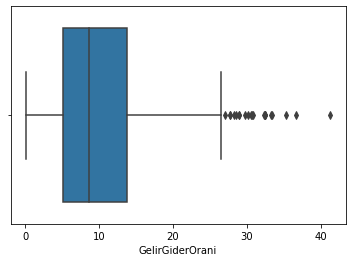

In [12]:
sns.boxplot(x =df_table);

In [13]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [14]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [15]:
print(alt_sinir)
print(ust_sinir)

-7.950000000000001
26.85


In [16]:
aykiri_tf = (df_table < alt_sinir) | (df_table > ust_sinir)
df_table[aykiri_tf]

51     32.5
81     29.7
105    30.1
175    28.9
281    32.5
307    32.3
374    28.5
393    30.7
424    28.2
456    27.7
479    28.9
497    41.3
568    30.6
580    27.1
585    35.3
594    33.3
657    36.6
715    27.7
776    32.4
826    30.8
847    33.4
Name: GelirGiderOrani, dtype: float64

In [17]:
aykiri_alt = (df_table < alt_sinir) 
aykiri_ust= (df_table > ust_sinir)
df_table[aykiri_alt] = alt_sinir
df_table[aykiri_ust] = ust_sinir
df_table[575:595]

575    24.20
576    18.10
577     6.10
578     9.70
579    11.20
580    26.85
581     2.50
582     8.60
583     5.00
584     4.50
585    26.85
586    17.00
587     3.70
588     4.10
589    15.00
590     9.00
591    13.00
592     5.90
593    19.50
594    26.85
Name: GelirGiderOrani, dtype: float64

In [18]:
df=df.drop(["GelirGiderOrani"], axis = 1)
df["GelirGiderOrani"]=df_table
df[575:595]

,Yas,Egitim,CalısmaYili,Gelir,GelirGiderOrani
575,28,4,0,29,24.20
576,29,1,6,21,18.10
577,29,2,3,26,6.10
578,24,2,2,26,9.70
579,53,1,9,50,11.20
580,39,1,19,60,26.85
581,28,4,2,41,2.50
582,38,1,16,37,8.60
583,39,1,12,46,5.00
584,38,1,18,44,4.50


Veri setimde aykırı değerler için baskılama yöntemi kullanarak gelir gider oranının fazla veya az olan değerleri minumum ve maximum değerlere atadık. Bu sayede veri kaybının önüne geçtik ve daha performanslı çalışacağını düşünüyorum.

In [19]:
df.isnull().sum()

Yas                0
Egitim             0
CalısmaYili        0
Gelir              0
GelirGiderOrani    0
dtype: int64

In [20]:
df.shape

(850, 5)

In [87]:
df.head()

,Yas,Egitim,CalısmaYili,Gelir,GelirGiderOrani
0,41,2,6,19,6.3
1,47,1,26,100,12.8
2,33,2,10,57,20.9
3,29,2,4,19,6.3
4,47,1,31,253,7.2


Veri setimizde eksik veri bulunmamaktadır ve makine öğrenmesinden önceki son halini ekrana bastırdık.

# Makine Öğrenmesi

## 1. Doğrusal Olmayan Regresyon

Veri setim için doğrusal olmayan regresyon seçme sebebim GelirGiderOranının herhangi bir veriyle doğrusal bir bağlantısı olmamasıdır.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Yas              850 non-null    int64  
 1   Egitim           850 non-null    int64  
 2   CalısmaYili      850 non-null    int64  
 3   Gelir            850 non-null    int64  
 4   GelirGiderOrani  850 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 33.3 KB


In [22]:
X = df.drop(df.columns[[4]], axis = 1)
y = df["GelirGiderOrani"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

### 1.1. K En Yakın Komşu (KNN)

In [23]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [24]:
y_pred = knn_model.predict(X_test)
print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))
RMSE = [] 
#cross validation yapmadan hatalara bir bakalim
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

test hatası: 7.262584092424026
k = 1 için RMSE değeri:  0.49808109015549534
k = 2 için RMSE değeri:  4.33864735502571
k = 3 için RMSE değeri:  4.930043488468022
k = 4 için RMSE değeri:  5.246500057487679
k = 5 için RMSE değeri:  5.385261939204644
k = 6 için RMSE değeri:  5.487766948457822
k = 7 için RMSE değeri:  5.6273591470981295
k = 8 için RMSE değeri:  5.745205639570588
k = 9 için RMSE değeri:  5.832772310283831
k = 10 için RMSE değeri:  5.937892361653849


In [25]:
#GridSearchCV ile optimum k sayisinin belirlenmesi
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [26]:
knn_cv_model.best_params_["n_neighbors"]

21

In [27]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    #cross validation olmadan hatalar
    RMSE.append(rmse) 
    #cross validation kullanilarak alindan hatalar
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.49808109015549534 RMSE_CV değeri:  8.626256576137829
k = 2 için RMSE değeri:  4.33864735502571 RMSE_CV değeri:  7.396462210226356
k = 3 için RMSE değeri:  4.930043488468022 RMSE_CV değeri:  7.006189168121409
k = 4 için RMSE değeri:  5.246500057487679 RMSE_CV değeri:  6.754344923045589
k = 5 için RMSE değeri:  5.385261939204644 RMSE_CV değeri:  6.650663814545668
k = 6 için RMSE değeri:  5.487766948457822 RMSE_CV değeri:  6.645014137470314
k = 7 için RMSE değeri:  5.6273591470981295 RMSE_CV değeri:  6.640487058581798
k = 8 için RMSE değeri:  5.745205639570588 RMSE_CV değeri:  6.646129997842273
k = 9 için RMSE değeri:  5.832772310283831 RMSE_CV değeri:  6.600367264824758
k = 10 için RMSE değeri:  5.937892361653849 RMSE_CV değeri:  6.576811282544555


In [28]:
#k=5 için train degil test setini denediğimizde
knn_tuned = KNeighborsRegressor(n_neighbors =5)
knn_tuned.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

7.262584092424026

In [29]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=21)

In [30]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

6.605606202335339

### 1.2. Çok Katmanlı Algılayıcı (Yapay Sinir Ağları YSA)


In [31]:
#değişken standartlaştırması
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)
print(mlp_model)
print(mlp_model.n_layers_)
print(mlp_model.hidden_layer_sizes)

MLPRegressor(hidden_layer_sizes=(100, 20))
4
(100, 20)


#### 1.2.1. Tahmin

In [32]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

6.507261836057683

#### 1.2.2. Model Tuning

In [33]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [34]:
mlp_tuned = MLPRegressor(activation=mlp_cv_model.best_params_['activation'],
                         alpha = mlp_cv_model.best_params_['alpha'], 
                         hidden_layer_sizes = mlp_cv_model.best_params_['hidden_layer_sizes'])
print(mlp_tuned)
print(mlp_tuned.activation)

MLPRegressor(activation='logistic', alpha=0.02,
             hidden_layer_sizes=(100, 50, 150))
logistic


In [35]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(activation='logistic', alpha=0.02,
             hidden_layer_sizes=(100, 50, 150))

In [36]:
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

6.473211938188688

### 1.3. Bagged Trees Regresyon

In [37]:
#bootstrap_features default degeri false, bootstrap orneklerini gozlemlemek icin true verdik
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [38]:
#tahminci sayisi
bag_model.n_estimators

10

In [39]:
#10 adet agac
bag_model.estimators_

[DecisionTreeRegressor(random_state=1726833417),
 DecisionTreeRegressor(random_state=1960079427),
 DecisionTreeRegressor(random_state=1353655939),
 DecisionTreeRegressor(random_state=902323060),
 DecisionTreeRegressor(random_state=1632843977),
 DecisionTreeRegressor(random_state=1167004367),
 DecisionTreeRegressor(random_state=1786234696),
 DecisionTreeRegressor(random_state=1886010245),
 DecisionTreeRegressor(random_state=896361747),
 DecisionTreeRegressor(random_state=2144242066)]

In [40]:
#her bir agacin ornekleri
bag_model.estimators_samples_

[array([184, 342,   5, 409, 552, 391, 326,  10, 406, 207, 557, 425, 524,
        179, 561, 630, 138, 218, 257, 554, 246, 230, 161, 582, 163, 182,
        291, 381, 368, 543, 510, 234, 145, 330, 297,  30, 160, 607, 391,
        205, 241, 132, 365, 565, 151, 499, 439, 254, 249, 355,   4, 386,
        553, 102, 412,  22, 156, 113,  57, 206,  88, 323,  73,  59, 610,
        218, 158, 320, 317, 567, 209, 130, 228, 149, 353, 214, 136, 387,
        293, 599, 286, 121, 582, 627, 555, 344, 350, 152, 122, 285,  16,
        414, 186, 599, 473, 580, 612,  56, 242, 195, 371, 152, 121, 248,
        250,  98, 370, 167, 213, 271, 611, 518, 230, 554, 570, 446, 633,
        445, 600, 489, 495, 454,  83, 149, 149, 331, 249, 532, 491, 180,
         21, 479, 290, 489, 352, 602, 436, 430, 519, 361, 303,  83, 552,
        479, 563, 333, 242, 283, 446, 366, 236,  26, 221, 302, 314, 105,
        224, 203, 270, 338, 493, 559, 280,  62, 593, 405,  46,  39, 463,
        542, 105, 257, 433, 565, 193, 488, 458, 201

In [41]:
#her agacin bagimsiz degiskenleri
bag_model.estimators_features_

[array([1, 2, 3, 3]),
 array([3, 1, 1, 2]),
 array([3, 2, 3, 1]),
 array([0, 0, 2, 3]),
 array([1, 1, 1, 2]),
 array([3, 2, 3, 3]),
 array([0, 0, 3, 0]),
 array([1, 3, 2, 1]),
 array([3, 1, 2, 0]),
 array([2, 1, 2, 1])]

#### 1.3.1. Tahmin


In [42]:
y_pred = bag_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

6.839116610834035

In [43]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, iki_y_pred))
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

9.43577810520702

#### 1.3.2. Model Tuning

In [44]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [45]:
bag_params = {"n_estimators": range(2,20)}
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [46]:
bag_cv_model.best_params_

{'n_estimators': 16}

In [47]:
bag_tuned = BaggingRegressor( n_estimators = 19, random_state = 45)
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=19, random_state=45)

In [48]:
y_pred = bag_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

7.013171662506802

### 1.4. Random Forests

In [49]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### 1.4.1. Tahmin

In [50]:
rf_model.predict(X_test)[0:5]

array([11.153 , 12.1655,  6.539 , 10.709 ,  9.133 ])

In [51]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

7.013990455994872

#### 1.4.2. Model Tuning

In [52]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}
rf_model = RandomForestRegressor(random_state = 42)
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [53]:
rf_cv_model.fit(X_train, y_train)
rf_cv_model.best_params_

{'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}

In [54]:
rf_tuned = RandomForestRegressor(max_depth  = 4, 
                                 max_features = 3, 
                                 n_estimators =2000)

In [55]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=3, n_estimators=2000)

In [56]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

6.523974747926032

Text(0.5, 0, 'Değişken Önem Düzeyleri')

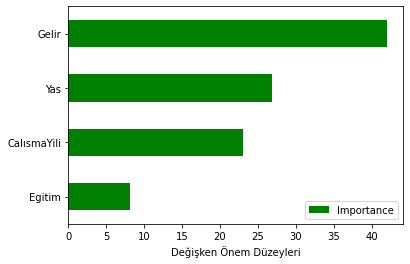

In [57]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Değişken Önem Düzeyleri")

### 1.5. Gradient Boosting Machines (GBM)

In [58]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

#### 1.5.1. Tahmin

In [59]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

6.707820743318875

#### 1.5.2. Model Tuning

In [60]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [61]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [62]:
gbm_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}

In [63]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.001,  
                                      max_depth = 100, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

6.49426033008921

Text(0.5, 0, 'Değişken Önem Düzeyleri')

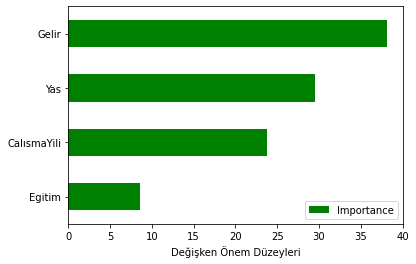

In [64]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Değişken Önem Düzeyleri")

### 1.6. XGBoost (eXtreme Gradient Boosting)

In [65]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [66]:
xgb_model = XGBRegressor().fit(X_train, y_train)

#### 1.6.1. Tahmin

In [67]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

7.668977049947113

#### 1.6.2. Model Tuning

In [68]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [69]:
xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)

xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [70]:
xgb_cv.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 500}

In [71]:
xgb_tuned = XGBRegressor(colsample_bytree = 1, 
                         learning_rate = 0.1, 
                         max_depth = 2, 
                         n_estimators = 500) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

6.663862096866403

Text(0.5, 0, 'Değişken Önem Düzeyleri')

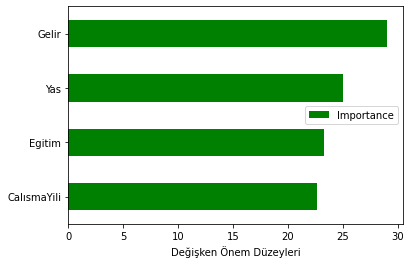

In [72]:
Importance = pd.DataFrame({"Importance": xgb_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Değişken Önem Düzeyleri")

### 1.7. Light GBM

In [73]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

#### 1.7.1. Tahmin

In [74]:
y_pred = lgbm_model.predict(X_test, num_iteration = lgbm_model.best_iteration_)
np.sqrt(mean_squared_error(y_test, y_pred))

6.955172488184218

#### 1.7.2. Model Tuning

In [75]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [76]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 40}

In [77]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.01, 
                           max_depth = 5, 
                           n_estimators = 40,
                          colsample_bytree = 0.9)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

6.4805956122355886

Text(0.5, 0, 'Değişken Önem Düzeyleri')

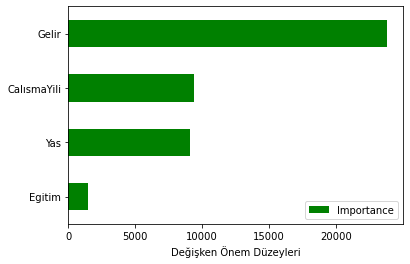

In [78]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Değişken Önem Düzeyleri")

### 1.8. CatBoost


In [79]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.038127
0:	learn: 6.3263832	total: 149ms	remaining: 2m 28s
1:	learn: 6.3165462	total: 150ms	remaining: 1m 14s
2:	learn: 6.3071290	total: 151ms	remaining: 50.3s
3:	learn: 6.2979020	total: 153ms	remaining: 38s
4:	learn: 6.2876949	total: 154ms	remaining: 30.6s
5:	learn: 6.2837419	total: 155ms	remaining: 25.6s
6:	learn: 6.2738906	total: 156ms	remaining: 22.1s
7:	learn: 6.2660541	total: 157ms	remaining: 19.4s
8:	learn: 6.2599259	total: 158ms	remaining: 17.4s
9:	learn: 6.2542386	total: 159ms	remaining: 15.8s
10:	learn: 6.2501507	total: 160ms	remaining: 14.4s
11:	learn: 6.2417867	total: 161ms	remaining: 13.3s
12:	learn: 6.2341302	total: 163ms	remaining: 12.3s
13:	learn: 6.2300639	total: 164ms	remaining: 11.5s
14:	learn: 6.2255029	total: 165ms	remaining: 10.8s
15:	learn: 6.2187668	total: 166ms	remaining: 10.2s
16:	learn: 6.2138748	total: 167ms	remaining: 9.65s
17:	learn: 6.2040595	total: 168ms	remaining: 9.17s
18:	learn: 6.1962084	total: 169ms	remaining: 8.73s
19:	learn: 

165:	learn: 5.6274556	total: 344ms	remaining: 1.73s
166:	learn: 5.6226174	total: 345ms	remaining: 1.72s
167:	learn: 5.6224423	total: 346ms	remaining: 1.71s
168:	learn: 5.6161482	total: 347ms	remaining: 1.71s
169:	learn: 5.6115656	total: 349ms	remaining: 1.7s
170:	learn: 5.6093285	total: 350ms	remaining: 1.7s
171:	learn: 5.6070678	total: 351ms	remaining: 1.69s
172:	learn: 5.6066153	total: 352ms	remaining: 1.68s
173:	learn: 5.6041510	total: 354ms	remaining: 1.68s
174:	learn: 5.6021232	total: 355ms	remaining: 1.67s
175:	learn: 5.5985495	total: 356ms	remaining: 1.67s
176:	learn: 5.5905925	total: 357ms	remaining: 1.66s
177:	learn: 5.5894984	total: 358ms	remaining: 1.66s
178:	learn: 5.5868040	total: 360ms	remaining: 1.65s
179:	learn: 5.5831669	total: 361ms	remaining: 1.64s
180:	learn: 5.5788091	total: 362ms	remaining: 1.64s
181:	learn: 5.5783413	total: 363ms	remaining: 1.63s
182:	learn: 5.5740870	total: 365ms	remaining: 1.63s
183:	learn: 5.5715457	total: 366ms	remaining: 1.62s
184:	learn: 5.

440:	learn: 4.8814940	total: 677ms	remaining: 858ms
441:	learn: 4.8779526	total: 678ms	remaining: 857ms
442:	learn: 4.8736948	total: 680ms	remaining: 855ms
443:	learn: 4.8710995	total: 681ms	remaining: 853ms
444:	learn: 4.8709807	total: 682ms	remaining: 851ms
445:	learn: 4.8684458	total: 683ms	remaining: 849ms
446:	learn: 4.8640335	total: 685ms	remaining: 847ms
447:	learn: 4.8590672	total: 686ms	remaining: 845ms
448:	learn: 4.8583677	total: 687ms	remaining: 843ms
449:	learn: 4.8538008	total: 688ms	remaining: 841ms
450:	learn: 4.8527548	total: 690ms	remaining: 839ms
451:	learn: 4.8514951	total: 691ms	remaining: 837ms
452:	learn: 4.8513818	total: 692ms	remaining: 835ms
453:	learn: 4.8489122	total: 693ms	remaining: 834ms
454:	learn: 4.8431586	total: 694ms	remaining: 831ms
455:	learn: 4.8366158	total: 695ms	remaining: 830ms
456:	learn: 4.8308826	total: 697ms	remaining: 828ms
457:	learn: 4.8292435	total: 698ms	remaining: 826ms
458:	learn: 4.8235726	total: 699ms	remaining: 824ms
459:	learn: 

712:	learn: 4.1887726	total: 1.01s	remaining: 407ms
713:	learn: 4.1847324	total: 1.01s	remaining: 406ms
714:	learn: 4.1846776	total: 1.01s	remaining: 405ms
715:	learn: 4.1844660	total: 1.02s	remaining: 403ms
716:	learn: 4.1819833	total: 1.02s	remaining: 402ms
717:	learn: 4.1805182	total: 1.02s	remaining: 400ms
718:	learn: 4.1791155	total: 1.02s	remaining: 399ms
719:	learn: 4.1790582	total: 1.02s	remaining: 397ms
720:	learn: 4.1763823	total: 1.02s	remaining: 396ms
721:	learn: 4.1748178	total: 1.02s	remaining: 394ms
722:	learn: 4.1727155	total: 1.02s	remaining: 393ms
723:	learn: 4.1707668	total: 1.02s	remaining: 391ms
724:	learn: 4.1679445	total: 1.03s	remaining: 390ms
725:	learn: 4.1647164	total: 1.03s	remaining: 388ms
726:	learn: 4.1614842	total: 1.03s	remaining: 386ms
727:	learn: 4.1564093	total: 1.03s	remaining: 385ms
728:	learn: 4.1551687	total: 1.03s	remaining: 383ms
729:	learn: 4.1522580	total: 1.03s	remaining: 382ms
730:	learn: 4.1484227	total: 1.03s	remaining: 380ms
731:	learn: 

991:	learn: 3.6429072	total: 1.33s	remaining: 10.8ms
992:	learn: 3.6411361	total: 1.34s	remaining: 9.43ms
993:	learn: 3.6375618	total: 1.34s	remaining: 8.08ms
994:	learn: 3.6334122	total: 1.34s	remaining: 6.73ms
995:	learn: 3.6310741	total: 1.34s	remaining: 5.38ms
996:	learn: 3.6309840	total: 1.34s	remaining: 4.04ms
997:	learn: 3.6273277	total: 1.34s	remaining: 2.69ms
998:	learn: 3.6236626	total: 1.34s	remaining: 1.34ms
999:	learn: 3.6203426	total: 1.34s	remaining: 0us


#### 1.8.1. Tahmin

In [80]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

6.935640395498566

#### 1.8.2. Model Tuning

In [81]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [82]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 6.3331869	total: 2.64ms	remaining: 525ms
1:	learn: 6.3296075	total: 5.39ms	remaining: 534ms
2:	learn: 6.3253738	total: 7.72ms	remaining: 507ms
3:	learn: 6.3225296	total: 10.1ms	remaining: 495ms
4:	learn: 6.3198650	total: 12.5ms	remaining: 488ms
5:	learn: 6.3168054	total: 14.8ms	remaining: 478ms
6:	learn: 6.3127194	total: 17.1ms	remaining: 471ms
7:	learn: 6.3110929	total: 19.6ms	remaining: 470ms
8:	learn: 6.3075770	total: 21.9ms	remaining: 466ms
9:	learn: 6.3068981	total: 22.7ms	remaining: 431ms
10:	learn: 6.3037298	total: 25ms	remaining: 430ms
11:	learn: 6.3018059	total: 27.2ms	remaining: 426ms
12:	learn: 6.2992923	total: 29.4ms	remaining: 423ms
13:	learn: 6.2966332	total: 31.7ms	remaining: 421ms
14:	learn: 6.2941609	total: 34ms	remaining: 419ms
15:	learn: 6.2912242	total: 36.2ms	remaining: 417ms
16:	learn: 6.2879135	total: 38.5ms	remaining: 415ms
17:	learn: 6.2849744	total: 40.8ms	remaining: 412ms
18:	learn: 6.282

165:	learn: 5.9552382	total: 353ms	remaining: 72.4ms
166:	learn: 5.9541126	total: 356ms	remaining: 70.3ms
167:	learn: 5.9513285	total: 358ms	remaining: 68.2ms
168:	learn: 5.9492716	total: 360ms	remaining: 66.1ms
169:	learn: 5.9454758	total: 362ms	remaining: 64ms
170:	learn: 5.9449974	total: 363ms	remaining: 61.6ms
171:	learn: 5.9430610	total: 366ms	remaining: 59.5ms
172:	learn: 5.9416128	total: 368ms	remaining: 57.4ms
173:	learn: 5.9396081	total: 370ms	remaining: 55.3ms
174:	learn: 5.9374363	total: 372ms	remaining: 53.1ms
175:	learn: 5.9349225	total: 374ms	remaining: 51ms
176:	learn: 5.9346102	total: 375ms	remaining: 48.7ms
177:	learn: 5.9323717	total: 377ms	remaining: 46.6ms
178:	learn: 5.9306408	total: 380ms	remaining: 44.5ms
179:	learn: 5.9297367	total: 381ms	remaining: 42.4ms
180:	learn: 5.9271384	total: 384ms	remaining: 40.3ms
181:	learn: 5.9243707	total: 386ms	remaining: 38.2ms
182:	learn: 5.9242924	total: 387ms	remaining: 35.9ms
183:	learn: 5.9228191	total: 389ms	remaining: 33.8

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000189EABB66A0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [83]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [84]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 6.3331869	total: 2.79ms	remaining: 555ms
1:	learn: 6.3296075	total: 5.47ms	remaining: 541ms
2:	learn: 6.3253738	total: 7.86ms	remaining: 516ms
3:	learn: 6.3225296	total: 10.4ms	remaining: 507ms
4:	learn: 6.3198650	total: 12.8ms	remaining: 497ms
5:	learn: 6.3168054	total: 15.1ms	remaining: 488ms
6:	learn: 6.3127194	total: 17ms	remaining: 470ms
7:	learn: 6.3110929	total: 19ms	remaining: 456ms
8:	learn: 6.3075770	total: 21ms	remaining: 446ms
9:	learn: 6.3068981	total: 22ms	remaining: 418ms
10:	learn: 6.3037298	total: 24.2ms	remaining: 416ms
11:	learn: 6.3018059	total: 26.4ms	remaining: 414ms
12:	learn: 6.2992923	total: 28.7ms	remaining: 413ms
13:	learn: 6.2966332	total: 31ms	remaining: 412ms
14:	learn: 6.2941609	total: 33.2ms	remaining: 409ms
15:	learn: 6.2912242	total: 35.5ms	remaining: 408ms
16:	learn: 6.2879135	total: 38.1ms	remaining: 410ms
17:	learn: 6.2849744	total: 40.5ms	remaining: 409ms
18:	learn: 6.2821223	total: 42.9ms	remaining: 409ms
19:	learn: 6.2790857	total: 45.3

167:	learn: 5.9513285	total: 346ms	remaining: 66ms
168:	learn: 5.9492716	total: 349ms	remaining: 64ms
169:	learn: 5.9454758	total: 351ms	remaining: 61.9ms
170:	learn: 5.9449974	total: 352ms	remaining: 59.6ms
171:	learn: 5.9430610	total: 354ms	remaining: 57.6ms
172:	learn: 5.9416128	total: 356ms	remaining: 55.6ms
173:	learn: 5.9396081	total: 359ms	remaining: 53.6ms
174:	learn: 5.9374363	total: 361ms	remaining: 51.5ms
175:	learn: 5.9349225	total: 363ms	remaining: 49.5ms
176:	learn: 5.9346102	total: 364ms	remaining: 47.3ms
177:	learn: 5.9323717	total: 366ms	remaining: 45.3ms
178:	learn: 5.9306408	total: 369ms	remaining: 43.3ms
179:	learn: 5.9297367	total: 371ms	remaining: 41.2ms
180:	learn: 5.9271384	total: 374ms	remaining: 39.2ms
181:	learn: 5.9243707	total: 376ms	remaining: 37.2ms
182:	learn: 5.9242924	total: 377ms	remaining: 35ms
183:	learn: 5.9228191	total: 379ms	remaining: 33ms
184:	learn: 5.9213026	total: 382ms	remaining: 31ms
185:	learn: 5.9194058	total: 384ms	remaining: 28.9ms
186

In [85]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

6.532003260829906

Text(0.5, 0, 'Değişken Önem Düzeyleri')

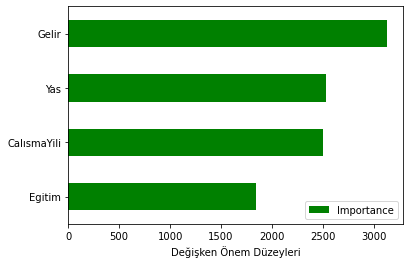

In [94]:
Importance = pd.DataFrame({"Importance": catb_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Değişken Önem Düzeyleri")

# SONUÇ
    
    Veri setimiz en iyi sonucu Çok Katmanlı Algılayıcı (Yapay Sinir Ağları YSA) modeli ile vermiştir. rme değerimiz 6.473211938188688'dir.


,Models,SONUÇ:
0,K En Yakın Komşu (KNN),6.605606
1,Çok Katmanlı Algılayıcı (Yapay Sinir Ağları YSA),6.473212
2,Bagged Trees Regresyon,7.013172
3,Random Forests,6.523975
4,Gradient Boosting Machines (GBM),6.494260
5,XGBoost (eXtreme Gradient Boosting),6.663862
6,Light GBM,6.480596
7,CatBoost,6.532003


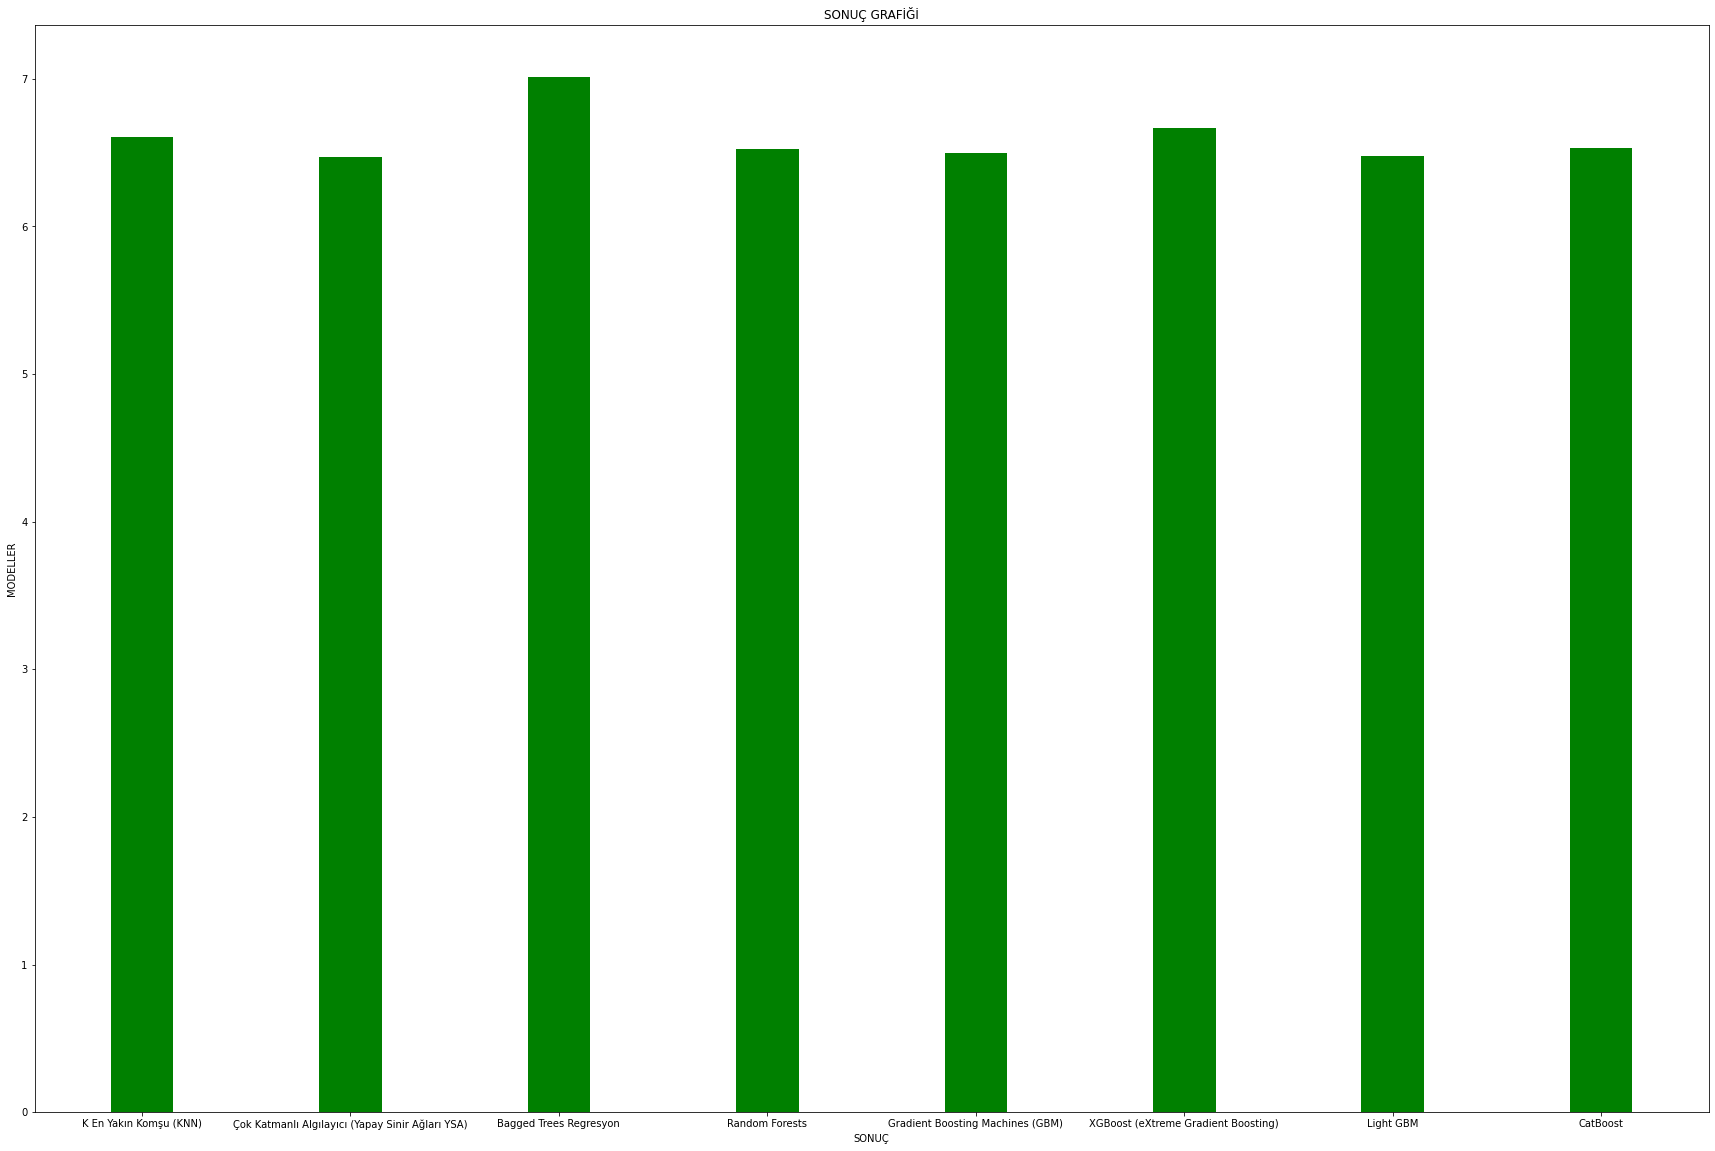

In [10]:
data = {'Models': ['K En Yakın Komşu (KNN)', 'Çok Katmanlı Algılayıcı (Yapay Sinir Ağları YSA)', 'Bagged Trees Regresyon', 'Random Forests', 'Gradient Boosting Machines (GBM)','XGBoost (eXtreme Gradient Boosting)', 'Light GBM', 'CatBoost'],
        'SONUÇ:': [6.605606202335339, 6.473211938188688, 7.013171662506802, 6.523974747926032, 6.49426033008921, 6.663862096866403, 6.4805956122355886, 6.532003260829906]
        }

result = pd.DataFrame(data)

display(result)

dataResult = {'K En Yakın Komşu (KNN)':6.605606202335339,
              'Çok Katmanlı Algılayıcı (Yapay Sinir Ağları YSA)':6.473211938188688, 
              'Bagged Trees Regresyon':7.013171662506802,
              'Random Forests':6.523974747926032, 
              'Gradient Boosting Machines (GBM)': 6.49426033008921, 
              'XGBoost (eXtreme Gradient Boosting)':6.663862096866403, 
              'Light GBM':6.4805956122355886,
              'CatBoost':6.532003260829906
              }
models = list(dataResult.keys())
values = list(dataResult.values())
  
fig = plt.figure(figsize = (30, 20))
 
# creating the bar plot
plt.bar(models, values, color ='g',
        width = 0.3)
 
plt.xlabel("SONUÇ")
plt.ylabel("MODELLER")
plt.title("SONUÇ GRAFİĞİ")
plt.show()

In [96]:
df.head()

,Yas,Egitim,CalısmaYili,Gelir,GelirGiderOrani
0,41,2,6,19,6.3
1,47,1,26,100,12.8
2,33,2,10,57,20.9
3,29,2,4,19,6.3
4,47,1,31,253,7.2


In [97]:
mlp_tuned.predict([[40,2,10,60]])

array([8.72988712])

In [98]:
mlp_tuned.predict([[40,1,10,60]])

array([8.72988684])

In [99]:
mlp_tuned.predict([[40,2,15,60]])

array([8.72988461])

In [102]:
mlp_tuned.predict([[40,2,10,100]])

array([8.72988281])

In [112]:
mlp_tuned.predict([[45,1,25,20]])

array([8.73302811])

In [114]:
mlp_tuned.predict([[20,2,2,2]])

array([9.82995798])

In [115]:
mlp_tuned.predict([[20,1,2,2]])

array([9.82118482])